kalo dimasukkan semua variabel untuk dapat kualitas pendidikan apakah perlu? kualitas pendidikan ditentukan apa sih
cukup masukkan 3 variabel itu saja (fasilitas, guru, dan putus sekolah)

nah buat menyatakan fasilitas memadai itu dibreakdown lagi gmn dari toilet kah atau apakah

dari guru juga gimanakah

dsb

endingnya emg kualitas in ibagus apa engga

makanya ada 3 fasilitas

- fasilitas bagus apa engga
- guru bagus apa engga
- putus sekolah

jadi ada klastering fasilitas (kurang cukup bagus) dari variabel” itu tadi

guru apa 

nanti di bagian metodologi cantumkan bagian hitung rasio 

dalam proses klastering,selain rasio juga masukkan jumlah guru 
rasio guru siswa, gurunya dimasukkan siswanya ga perlu 

analisis faktor (korelasi → heatmap) 

lakukan analisis korelasi (dipilih variabel yang penting aja APM APS Angka lulusan)

12 x 12 kalo di excel 
yang diperhatikan apm aps aja 

1. Clustering per jenjang
2. Setiap jenjang lihat variabelnya based on 3 kategori itu
3. kategori fasilitas dianalisis dulu 

variabel apa yang berkorelasi tinggi dengan 

silhoutte analisis (berapa klaster)
kalo 3 (baik sedang, jelek)

hasil analisis korelasi jadi kesimpulan 

atau analisis per klaster
jelek → kabupaten mana aja 

analisis kabupaten yang jelek aja

mungkin bagi klaster kp bagus itu faktor putus sekolah karena guru belum memadai 

atau kalo yg jelek karena fasilitas

kalo mau melakukan visualisasi klaster itu pake pca
pca untuk mereduksi dimensi 

**ini karena banyak variabelnya jd direduksi untuk bisa tau persebarannya

bikin per jenjang (SD SMP SMA)
Tentukan jumlah klaster kemudian siluet mulai dari 2-6 klaster**

**elbow method → siluet** 

**semua variabel semua jenjang** 

**habis klastering visualisasi klaster dengan PCA (persebaran data) → untuk dapat visualisasi scatter plot** 

**korelasi dilihat dari APM APS angka lulus 

output visualisasi berupa scatterplot dan PCA dari setiap klaster dan setiap jenjang**

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
path = 'Dataset_EmotKucing_Sheet1.csv'  # Ensure the file is in the same directory as the notebook
df = pd.read_csv(path)

In [96]:
df.columns

Index(['id', 'kode_kabupaten_kota', 'Kabupaten - Kota',
       'persentase_capaian_spm', 'Rasio_Guru_Siswa_SD', 'Rasio_Guru_Siswa_SMP',
       'Rasio_Guru_Siswa_SMA', 'rasio_kelas_guru_sd', 'rasio_kelas_guru_smp',
       'rasio_kelas_guru_sma', 'rasio_uks_per_sekolah_sd',
       'rasio_uks_per_sekolah_smp', 'rasio_uks_per_sekolah_sma',
       'rasio_perpustakaan_per_sekolah_sd',
       'rasio_perpustakaan_per_sekolah_smp',
       'rasio_perpustakaan_per_sekolah_sma', 'jumlah_rombel_sd',
       'jumlah_rombel_smp', 'jumlah_rombel_sma', 'Jumlah_Siswa_SD',
       'Jumlah_Siswa_SMP', 'Jumlah_Siswa_SMA', 'Jumlah_Sekolah_SD',
       'Jumlah_Sekolah_SMP', 'Jumlah_Sekolah_SMA', 'Angka_Harapan_Sekolah',
       'Rata-rata-Lama_Sekolah(Tahun)', 'APS(7-12)', 'APS(13-15)',
       'APS(16-18)', 'APS(19-23)', 'Putus_Sekolah(SD)', 'Putus_Sekolah(SMP)',
       'Putus_Sekolah(SMA)', 'Putus_Sekolah(SMK/MAK)',
       'Guru_Bersertifikasi(SD)', 'Jumlah_Guru_SD',
       'Persen_Guru_Bersertifikasi(SD)', 'Ju

In [97]:
daerah = df['Kabupaten - Kota']

In [98]:
object_columns = df.select_dtypes(include=['object']).columns
print(object_columns)
df.drop(object_columns, axis=1)

Index(['Kabupaten - Kota', 'Rasio_Siswa_Kelas_SMP', 'Rasio_Siswa_Kelas_SMA'], dtype='object')


,id,kode_kabupaten_kota,persentase_capaian_spm,Rasio_Guru_Siswa_SD,Rasio_Guru_Siswa_SMP,Rasio_Guru_Siswa_SMA,rasio_kelas_guru_sd,rasio_kelas_guru_smp,rasio_kelas_guru_sma,rasio_uks_per_sekolah_sd,...,Jumlah_Ruang_Kelas_SMA,Usaha_Kesehatan_SD,Usaha_Kesehatan_SMP,Usaha_Kesehatan_SMA,Jumlah_Toilet_Guru_SD,Jumlah_Toilet_Guru_SMP,Jumlah_Toilet_Guru_SMA,Jumlah_Toilet_Siswa_SD,Jumlah_Toilet_Siswa_SMP,Jumlah_Toilet_Siswa_SMA
0,26.0,3526.0,66.68,18.0,11.0,13.0,0.78,0.27,0.52,0.22,...,269.0,133.0,35.0,10.0,410.0,69.0,14.0,346.0,35.0,12.0
1,10.0,3510.0,83.40,15.0,19.0,17.0,0.86,0.36,0.39,0.47,...,448.0,352.0,63.0,17.0,832.0,97.0,38.0,449.0,44.0,12.0
2,5.0,3505.0,81.58,10.0,16.0,20.0,0.75,0.46,0.58,0.67,...,215.0,423.0,46.0,8.0,736.0,105.0,22.0,352.0,39.0,10.0
3,22.0,3522.0,85.59,10.0,16.0,17.0,0.75,0.54,0.52,0.37,...,444.0,253.0,49.0,18.0,783.0,113.0,45.0,436.0,46.0,12.0
4,11.0,3511.0,77.73,10.0,12.0,14.0,0.67,0.38,0.67,0.42,...,187.0,186.0,29.0,10.0,485.0,114.0,22.0,558.0,51.0,20.0
5,25.0,3525.0,81.72,14.0,19.0,18.0,0.71,0.37,0.25,0.56,...,350.0,219.0,32.0,8.0,440.0,107.0,35.0,472.0,51.0,17.0
6,9.0,3509.0,75.51,19.0,19.0,18.0,0.96,0.33,0.38,0.56,...,476.0,508.0,79.0,18.0,1186.0,103.0,50.0,464.0,46.0,10.0
7,17.0,3517.0,79.39,16.0,22.0,16.0,0.89,0.44,0.33,0.58,...,292.0,276.0,50.0,14.0,679.0,94.0,39.0,346.0,34.0,10.0
8,6.0,3506.0,82.56,14.0,21.0,18.0,0.85,0.49,0.54,0.50,...,419.0,306.0,48.0,14.0,904.0,99.0,33.0,414.0,45.0,10.0
9,24.0,3524.0,81.58,15.0,16.0,17.0,5.02,1.67,0.21,0.40,...,371.0,236.0,48.0,12.0,665.0,96.0,31.0,346.0,38.0,10.0


In [99]:
sd_columns = [col for col in df.columns if 'sd' in col.lower()]
smp_columns = [col for col in df.columns if 'smp' in col.lower()]
sma_columns = [col for col in df.columns if 'sma' in col.lower()]

In [100]:
sd_columns.append('APS(7-12)')
smp_columns.append('APS(13-15)')
sma_columns.append('APS(16-18)')

In [101]:
# Combine all columns from sd_columns, smp_columns, and sma_columns
combined_columns = set(sd_columns + smp_columns + sma_columns)

# Find columns in df that are not in the combined_columns
index_pd = [col for col in df.columns if col not in combined_columns]
index_pd = [col for col in df.columns if col not in combined_columns and pd.api.types.is_numeric_dtype(df[col])]

In [102]:
df_sd = df[index_pd + sd_columns]
df_smp = df[index_pd + smp_columns]
df_sma = df[index_pd + sma_columns]

In [103]:
df_sd = df_sd.select_dtypes(exclude=['object'])
df_sma = df_sma.select_dtypes(exclude=['object'])
df_smp = df_smp.select_dtypes(exclude=['object'])

In [104]:
df_sd

,id,kode_kabupaten_kota,persentase_capaian_spm,Angka_Harapan_Sekolah,Rata-rata-Lama_Sekolah(Tahun),APS(19-23),Putus_Sekolah(SMK/MAK),Rasio_Guru_Siswa_SD,rasio_kelas_guru_sd,rasio_uks_per_sekolah_sd,...,Jumlah_Guru_SD,Persen_Guru_Bersertifikasi(SD),Perpustakaan_SD,Ruang_Kelas_Baik_SD,Jumlah_Ruang_Kelas_SD,Rasio_Siswa_Kelas_SD,Usaha_Kesehatan_SD,Jumlah_Toilet_Guru_SD,Jumlah_Toilet_Siswa_SD,APS(7-12)
0,26.0,3526.0,66.68,11.98,6.0,14.21,49.0,18.0,0.78,0.22,...,5071,35.0,407.0,809.0,3949.0,23.0,133.0,410.0,346.0,99.94
1,10.0,3510.0,83.40,13.14,8.0,16.52,17.0,15.0,0.86,0.47,...,6231,32.0,510.0,1670.0,5344.0,17.0,352.0,832.0,449.0,99.61
2,5.0,3505.0,81.58,12.67,8.0,14.92,5.0,10.0,0.75,0.67,...,5629,40.0,485.0,1325.0,4217.0,13.0,423.0,736.0,352.0,99.53
3,22.0,3522.0,85.59,13.18,8.0,21.13,10.0,10.0,0.75,0.37,...,6001,36.0,435.0,1677.0,4498.0,14.0,253.0,783.0,436.0,99.77
4,11.0,3511.0,77.73,13.33,7.0,14.53,120.0,10.0,0.67,0.42,...,4590,33.0,340.0,1239.0,3089.0,15.0,186.0,485.0,558.0,97.86
5,25.0,3525.0,81.72,13.98,10.0,27.68,31.0,14.0,0.71,0.56,...,4153,35.0,324.0,734.0,2946.0,20.0,219.0,440.0,472.0,99.33
6,9.0,3509.0,75.51,13.50,7.0,26.11,139.0,19.0,0.96,0.56,...,7341,37.0,699.0,2834.0,7041.0,20.0,508.0,1186.0,464.0,98.83
7,17.0,3517.0,79.39,13.61,9.0,21.30,4.0,16.0,0.89,0.58,...,3693,48.0,451.0,1066.0,3272.0,18.0,276.0,679.0,346.0,99.74
8,6.0,3506.0,82.56,13.63,8.0,18.16,4.0,14.0,0.85,0.50,...,5492,39.0,422.0,1184.0,4657.0,16.0,306.0,904.0,414.0,99.99
9,24.0,3524.0,81.58,14.03,8.0,24.04,11.0,15.0,5.02,0.40,...,759,33.0,387.0,885.0,3807.0,11.0,236.0,665.0,346.0,99.99


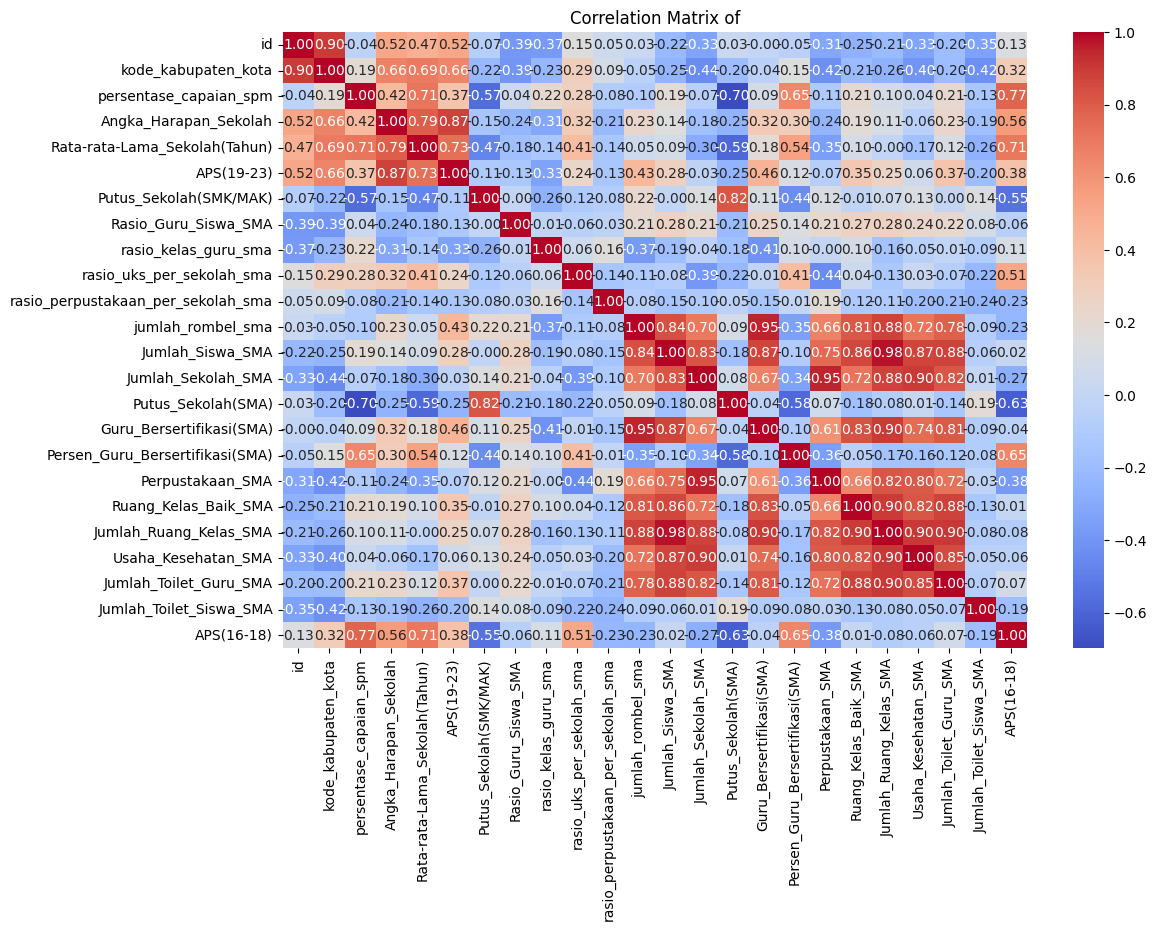

In [111]:

correlation_matrix = df_sma.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of")
plt.show()